<a href="https://colab.research.google.com/github/cglnrdgn/PlantPestDetection/blob/main/GoogleNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json


train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'

img_width, img_height = 224, 224
num_classes = 12
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001

inception_histories = []


output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)


for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.Adam(learning_rate=inception_learning_rate)


        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


        for layer in base_model.layers:
            layer.trainable = False


        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')


        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )


        inception_histories.append({
            'model': 'InceptionV3',
            'optimizer': 'Adam',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })


file_path = os.path.join(output_folder, 'inception_histories.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories, file)


with open(file_path, 'r') as file:
    loaded_histories = json.load(file)


for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    print("--------------------")


Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/15
88/88 [==============================] - 59s 618ms/step - loss: 0.9911 - accuracy: 0.6950 - val_loss: 0.7177 - val_accuracy: 0.7625
Epoch 2/15
88/88 [==============================] - 48s 547ms/step - loss: 0.5771 - accuracy: 0.8095 - val_loss: 0.5754 - val_accuracy: 0.8104
Epoch 3/15
88/88 [==============================] - 48s 550ms/step - loss: 0.4934 - accuracy: 0.8357 - val_loss: 0.6482 - val_accuracy: 0.7771
Epoch 4/15
88/88 [==============================] - 50s 568ms/step - loss: 0.4690 - accuracy: 0.8403 - val_loss: 0.6290 - val_accuracy: 0.7833
Epoch 5/15
88/88 [==============================] - 49s 553ms/step - loss: 0.4168 - accuracy: 0.8608 - val_loss: 0.5490 - val_accuracy: 0.8083
Epoch 6/15
88/88 [==============================] - 49s 555ms/step - loss: 0.3903 - accuracy: 0.8694 - val_loss: 0.5478 - val_accuracy: 0.8188
Epoch 7/15
88/88 [==============================] - 52s 5

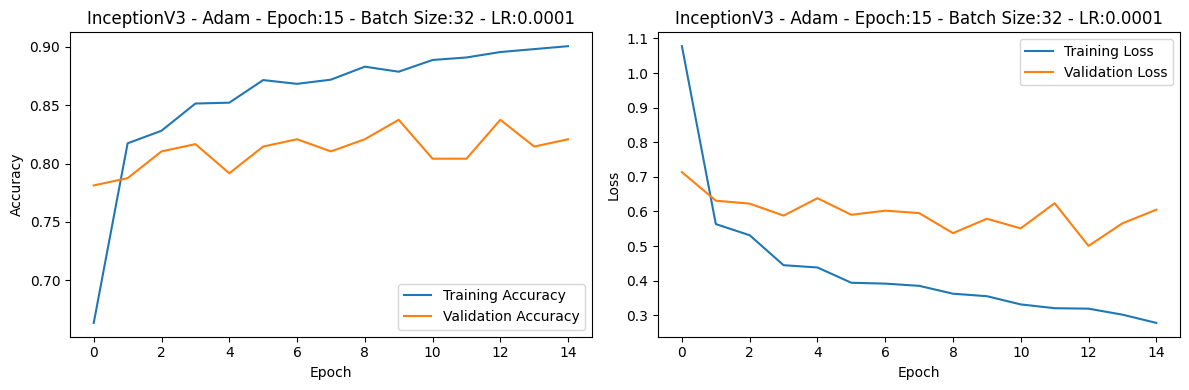

Found 480 images belonging to 12 classes.
15/15 [==============================] - 163s 12s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:15 - Batch Size:32 - LR:0.0001:
[[36  0  1  0  0  2  0  0  0  0  1  0]
 [ 1 35  3  0  0  0  0  0  0  0  1  0]
 [ 0  0 32  1  1  0  2  0  1  0  1  2]
 [ 1  1  3 26  0  0  6  1  1  0  1  0]
 [ 0  0  1  8 28  0  1  0  2  0  0  0]
 [ 3  0  4  3  2 23  2  2  1  0  0  0]
 [ 0  0  0  0  1  0 36  3  0  0  0  0]
 [ 0  0  0  2  1  1  1 35  0  0  0  0]
 [ 0  0  4  6  1  0  1  0 28  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 39  0  0]
 [ 0  2  0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 40]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.88      0.90      0.89        40
        bees       0.92      0.88      0.90        40
      beetle       0.67      0.80      0.73        40
catterpillar       0.55      0.65      0.60        40
  earthworms       0.80      0.70      0.75        40
     

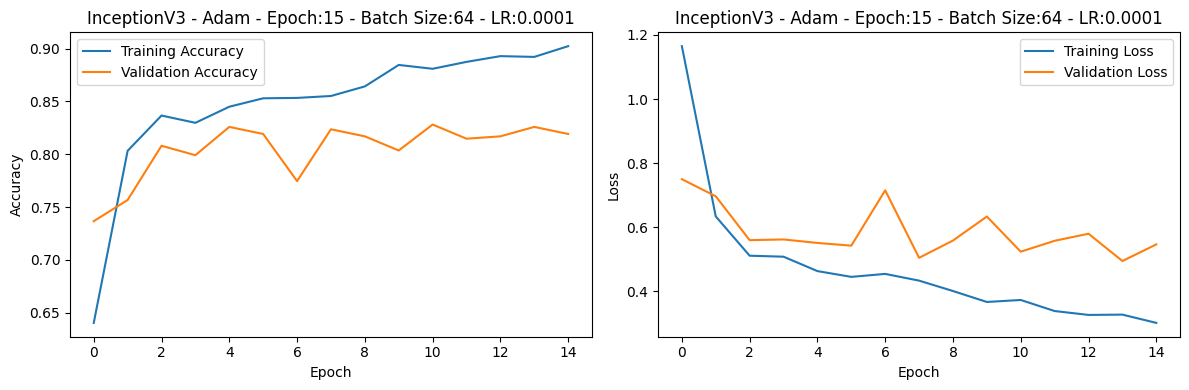

Found 480 images belonging to 12 classes.
8/8 [==============================] - 8s 1s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:15 - Batch Size:64 - LR:0.0001:
[[35  0  2  0  0  1  1  0  0  0  1  0]
 [ 0 35  2  0  0  0  2  0  0  0  1  0]
 [ 1  0 28  2  0  3  1  1  1  0  1  2]
 [ 0  0  6 26  0  1  2  3  2  0  0  0]
 [ 0  0  1  4 26  0  3  1  5  0  0  0]
 [ 3  1  5  2  1 22  3  0  0  0  2  1]
 [ 1  1  0  2  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 39  0  0  0  0]
 [ 0  0  4  1  0  2  1  0 32  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0]
 [ 0  2  2  0  0  0  0  0  0  0 36  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.85      0.88      0.86        40
        bees       0.90      0.88      0.89        40
      beetle       0.56      0.70      0.62        40
catterpillar       0.70      0.65      0.68        40
  earthworms       0.96      0.65      0.78        40
      earw

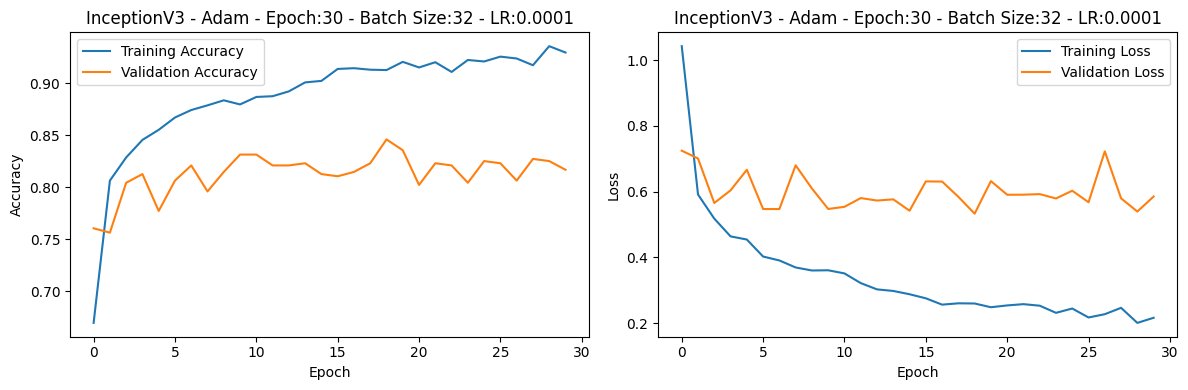

Found 480 images belonging to 12 classes.
15/15 [==============================] - 6s 429ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:30 - Batch Size:32 - LR:0.0001:
[[38  0  0  0  0  2  0  0  0  0  0  0]
 [ 0 36  1  0  1  0  0  0  0  0  2  0]
 [ 0  0 28  2  0  5  1  1  0  0  0  3]
 [ 0  2  4 22  0  3  4  2  3  0  0  0]
 [ 0  0  1  7 28  0  0  0  4  0  0  0]
 [ 4  1  4  1  0 24  2  0  2  0  2  0]
 [ 0  1  2  1  0  0 35  1  0  0  0  0]
 [ 0  0  0  0  1  0  0 39  0  0  0  0]
 [ 0  0  3  2  1  3  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 38  0  0]
 [ 0  3  0  0  0  1  0  0  0  0 36  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.90      0.95      0.93        40
        bees       0.84      0.90      0.87        40
      beetle       0.64      0.70      0.67        40
catterpillar       0.63      0.55      0.59        40
  earthworms       0.90      0.70      0.79        40
     

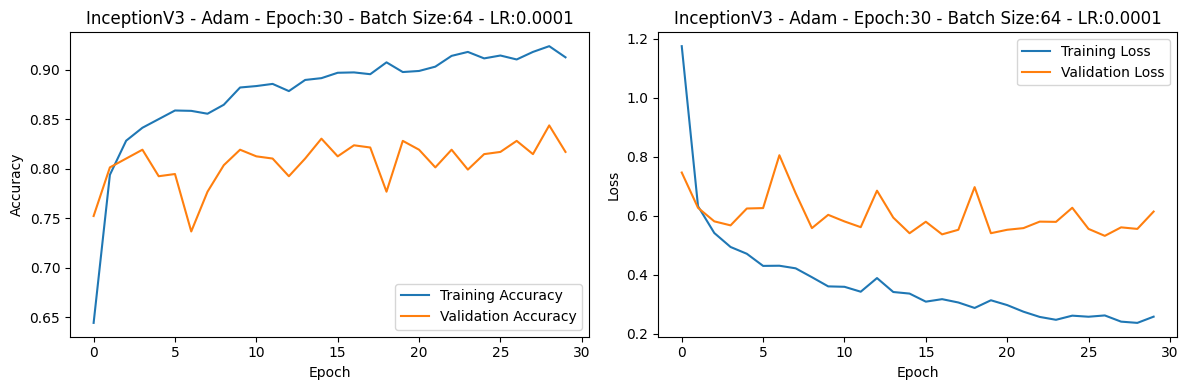

Found 480 images belonging to 12 classes.
8/8 [==============================] - 9s 1s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:30 - Batch Size:64 - LR:0.0001:
[[37  0  0  1  0  2  0  0  0  0  0  0]
 [ 1 38  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 26  1  0  3  2  0  2  0  1  5]
 [ 1  2  4 21  1  2  7  1  1  0  0  0]
 [ 0  0  3  6 28  0  0  0  2  1  0  0]
 [ 2  2  4  3  1 23  1  1  1  0  2  0]
 [ 0  1  0  0  0  0 38  1  0  0  0  0]
 [ 0  0  0  0  2  0  1 37  0  0  0  0]
 [ 0  0  3  5  1  0  1  0 29  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0]
 [ 0  1  1  1  0  2  1  1  0  0 33  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.90      0.93      0.91        40
        bees       0.86      0.95      0.90        40
      beetle       0.62      0.65      0.63        40
catterpillar       0.55      0.53      0.54        40
  earthworms       0.85      0.70      0.77        40
      earw

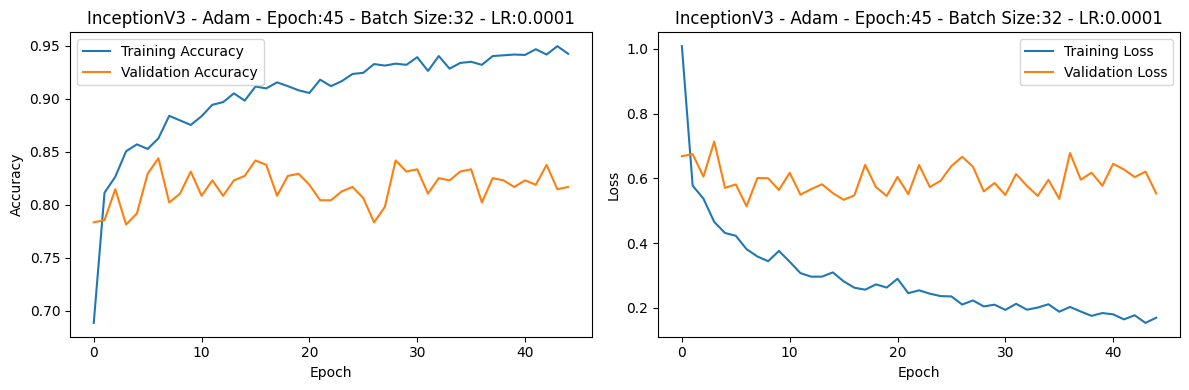

Found 480 images belonging to 12 classes.
15/15 [==============================] - 6s 426ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:32 - LR:0.0001:
[[36  0  2  0  0  1  0  0  0  0  1  0]
 [ 1 35  3  0  0  0  0  0  0  0  1  0]
 [ 0  0 32  0  0  0  3  0  2  0  1  2]
 [ 0  0  4 23  0  1  8  3  1  0  0  0]
 [ 0  0  2  8 27  0  0  1  2  0  0  0]
 [ 3  0  7  4  1 20  4  0  0  0  1  0]
 [ 0  1  1  3  0  0 35  0  0  0  0  0]
 [ 0  0  0  1  0  0  1 38  0  0  0  0]
 [ 0  0  4  3  2  1  2  0 28  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  1  0  2  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.90      0.90      0.90        40
        bees       0.95      0.88      0.91        40
      beetle       0.58      0.80      0.67        40
catterpillar       0.53      0.57      0.55        40
  earthworms       0.90      0.68      0.77        40
     

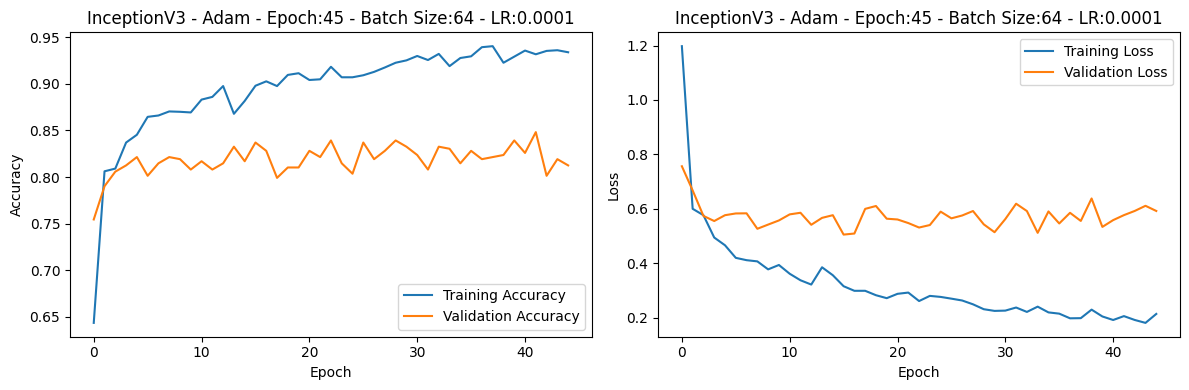

Found 480 images belonging to 12 classes.
8/8 [==============================] - 9s 1s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:64 - LR:0.0001:
[[35  0  2  0  0  2  1  0  0  0  0  0]
 [ 0 38  1  0  0  0  0  0  0  0  1  0]
 [ 1  0 31  2  0  2  2  1  0  0  1  0]
 [ 0  2  1 28  0  2  4  2  1  0  0  0]
 [ 0  0  1  7 27  0  1  2  2  0  0  0]
 [ 4  1  4  5  0 22  2  1  1  0  0  0]
 [ 0  0  2  0  1  1 34  2  0  0  0  0]
 [ 0  0  0  0  1  0  0 38  1  0  0  0]
 [ 0  0  3  3  2  0  1  1 30  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0]
 [ 0  2  0  0  0  2  0  0  0  0 36  0]
 [ 0  0  1  0  0  1  0  0  0  0  0 38]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.88      0.88      0.88        40
        bees       0.88      0.95      0.92        40
      beetle       0.67      0.78      0.72        40
catterpillar       0.62      0.70      0.66        40
  earthworms       0.87      0.68      0.76        40
      earw

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


for history in inception_histories:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False
    )

    predictions = model.predict(test_generator)

    y_pred = np.argmax(predictions, axis=1)

    y_true = test_generator.classes


    cm = confusion_matrix(y_true, y_pred)

    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json


train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'


img_width, img_height = 224, 224
num_classes = 12
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001


inception_histories2 = []


output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)


for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=inception_learning_rate)


        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        inception_histories2.append({
            'model': 'InceptionV3',
            'optimizer': 'RMSprop',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })

file_path = os.path.join(output_folder, 'inception_histories2.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories2, file)

with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    print("--------------------")


Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/15
88/88 [==============================] - 56s 571ms/step - loss: 0.9667 - accuracy: 0.7029 - val_loss: 0.7730 - val_accuracy: 0.7417
Epoch 2/15
88/88 [==============================] - 48s 549ms/step - loss: 0.6139 - accuracy: 0.7962 - val_loss: 0.6769 - val_accuracy: 0.7792
Epoch 3/15
88/88 [==============================] - 52s 592ms/step - loss: 0.5216 - accuracy: 0.8267 - val_loss: 0.6964 - val_accuracy: 0.7812
Epoch 4/15
88/88 [==============================] - 48s 556ms/step - loss: 0.4907 - accuracy: 0.8378 - val_loss: 0.6372 - val_accuracy: 0.7771
Epoch 5/15
88/88 [==============================] - 49s 552ms/step - loss: 0.4581 - accuracy: 0.8468 - val_loss: 0.5350 - val_accuracy: 0.8292
Epoch 6/15
88/88 [==============================] - 55s 628ms/step - loss: 0.4247 - accuracy: 0.8601 - val_loss: 0.6058 - val_accuracy: 0.8188
Epoch 7/15
88/88 [==============================] - 49s 5

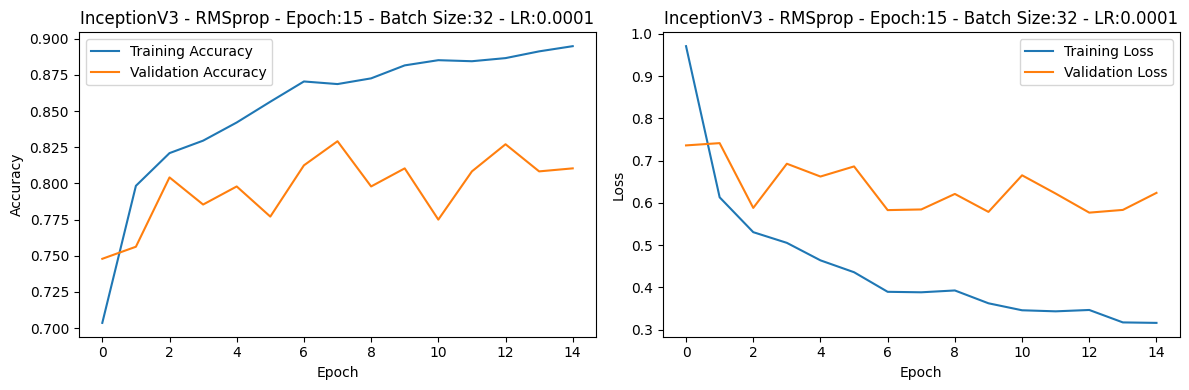

Found 480 images belonging to 12 classes.
15/15 [==============================] - 9s 543ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:32 - LR:0.0001:
[[30  0  0  1  0  6  1  0  0  0  2  0]
 [ 0 34  2  1  0  0  0  0  0  0  3  0]
 [ 1  0 28  1  0  1  2  0  1  0  4  2]
 [ 0  1  2 26  0  2  5  1  3  0  0  0]
 [ 0  0  2  3 29  0  0  2  4  0  0  0]
 [ 2  0  4  0  1 27  1  1  1  0  3  0]
 [ 0  1  1  0  0  0 36  0  0  0  2  0]
 [ 0  0  0  2  1  0  2 35  0  0  0  0]
 [ 0  0  1  7  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 37  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 39  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.91      0.75      0.82        40
        bees       0.92      0.85      0.88        40
      beetle       0.68      0.70      0.69        40
catterpillar       0.63      0.65      0.64        40
  earthworms       0.94      0.72      0.82        40
  

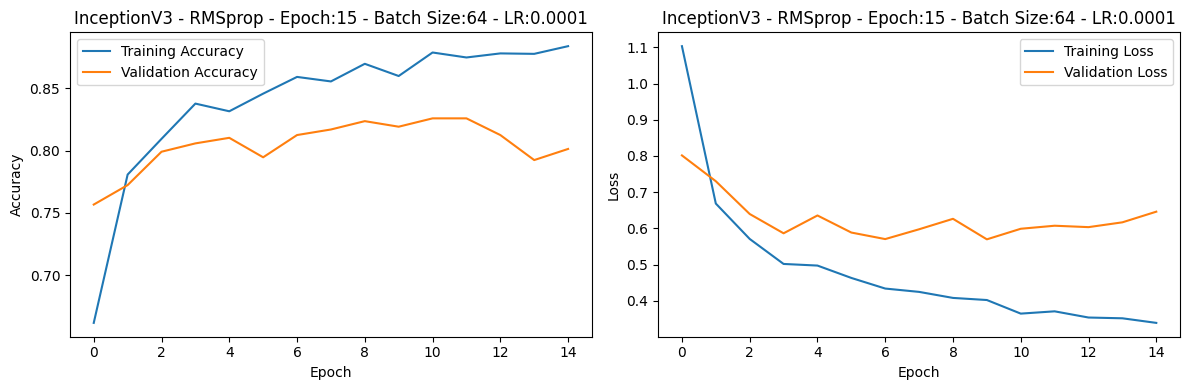

Found 480 images belonging to 12 classes.
8/8 [==============================] - 7s 838ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:64 - LR:0.0001:
[[34  0  2  1  0  0  1  0  0  0  2  0]
 [ 0 35  1  2  0  0  1  0  0  0  1  0]
 [ 1  0 27  2  0  2  1  0  1  0  4  2]
 [ 0  2  5 27  0  2  1  0  3  0  0  0]
 [ 0  0  3  2 26  5  0  0  4  0  0  0]
 [ 1  1  6  4  2 24  1  0  0  0  0  1]
 [ 0  1  0  2  0  1 36  0  0  0  0  0]
 [ 0  0  0  1  1  0  0 38  0  0  0  0]
 [ 0  0  1  5  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 39  0  0]
 [ 0  1  0  1  0  1  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 40]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.94      0.85      0.89        40
        bees       0.88      0.88      0.88        40
      beetle       0.60      0.68      0.64        40
catterpillar       0.57      0.68      0.62        40
  earthworms       0.90      0.65      0.75        40
    

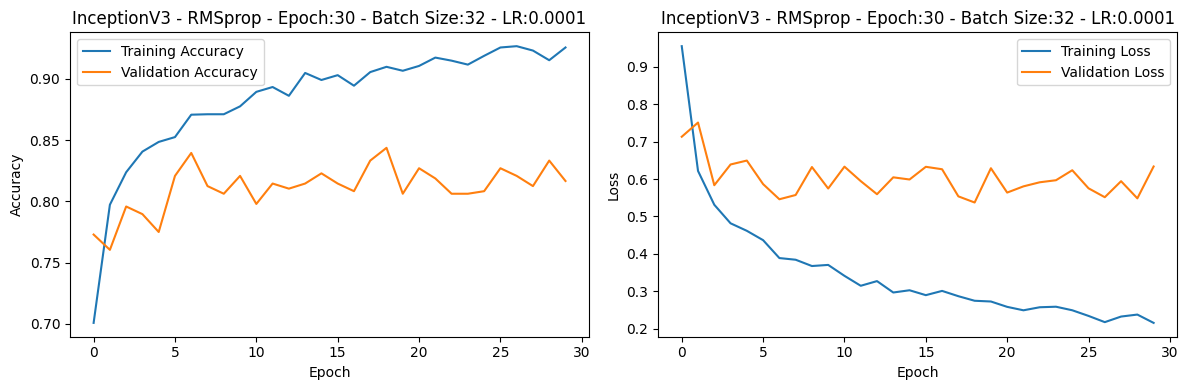

Found 480 images belonging to 12 classes.
15/15 [==============================] - 7s 473ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:32 - LR:0.0001:
[[35  0  3  1  0  0  0  0  0  0  1  0]
 [ 0 34  0  0  0  0  1  0  0  0  5  0]
 [ 0  0 29  2  0  2  1  0  2  0  4  0]
 [ 0  0  3 26  0  4  3  2  2  0  0  0]
 [ 0  0  0  8 25  0  1  0  5  0  1  0]
 [ 1  0  3  1  1 24  3  1  3  0  2  1]
 [ 0  0  2  1  0  0 36  1  0  0  0  0]
 [ 0  0  0  1  1  0  0 37  1  0  0  0]
 [ 0  0  2  5  1  1  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 40]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.97      0.88      0.92        40
        bees       0.97      0.85      0.91        40
      beetle       0.69      0.72      0.71        40
catterpillar       0.58      0.65      0.61        40
  earthworms       0.89      0.62      0.74        40
  

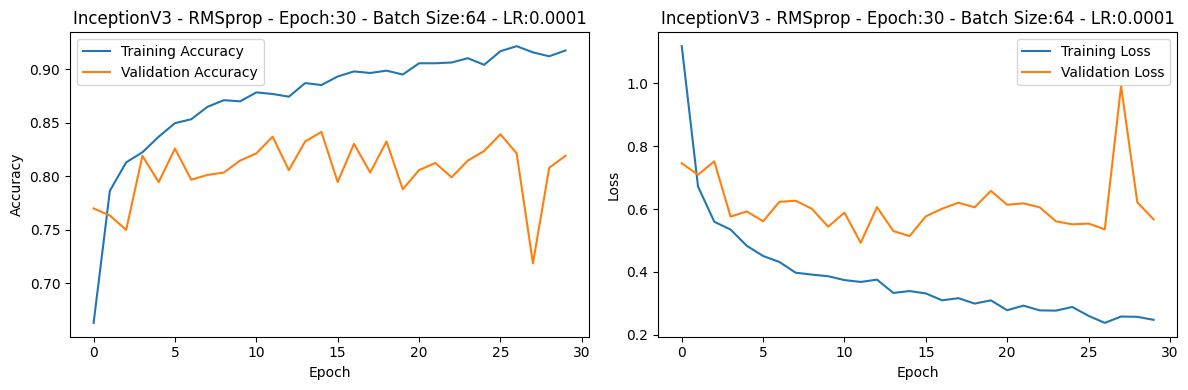

Found 480 images belonging to 12 classes.
8/8 [==============================] - 8s 1s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:64 - LR:0.0001:
[[35  0  1  1  0  1  0  0  0  0  2  0]
 [ 0 35  1  1  0  0  1  0  0  0  2  0]
 [ 0  0 28  1  1  3  0  1  2  0  4  0]
 [ 0  0  1 28  0  3  6  1  1  0  0  0]
 [ 0  0  1  5 25  1  0  0  8  0  0  0]
 [ 1  0  5  1  2 26  2  0  1  0  2  0]
 [ 0  0  0  0  0  3 37  0  0  0  0  0]
 [ 0  0  0  1  0  1  0 38  0  0  0  0]
 [ 0  0  0  7  1  1  1  1 29  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 39  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.97      0.88      0.92        40
        bees       1.00      0.88      0.93        40
      beetle       0.74      0.70      0.72        40
catterpillar       0.62      0.70      0.66        40
  earthworms       0.86      0.62      0.72        40
      e

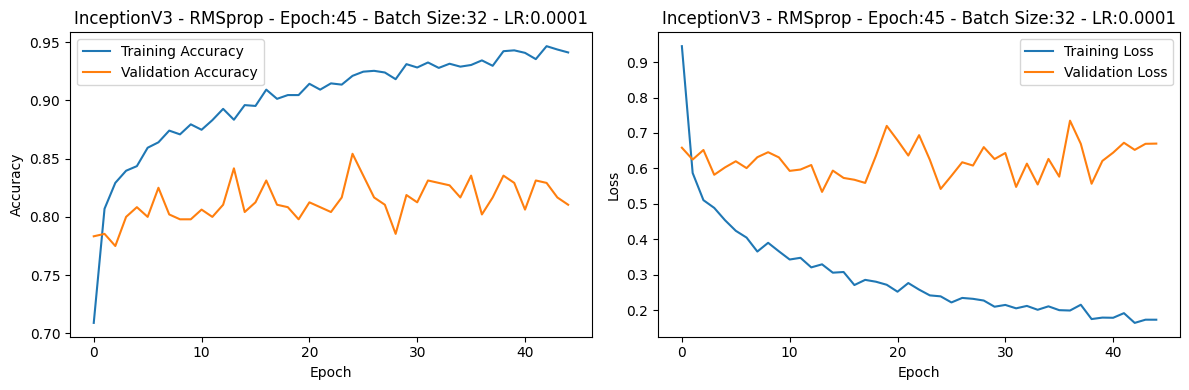

Found 480 images belonging to 12 classes.
15/15 [==============================] - 6s 411ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:32 - LR:0.0001:
[[36  1  0  1  0  1  0  0  0  0  1  0]
 [ 0 34  1  1  0  0  0  1  0  0  2  1]
 [ 0  0 26  1  1  2  2  0  2  0  3  3]
 [ 0  0  1 26  0  5  5  1  2  0  0  0]
 [ 0  0  2  0 30  1  0  2  5  0  0  0]
 [ 2  0  5  1  1 27  0  0  1  0  3  0]
 [ 0  1  1  0  0  1 32  3  0  0  2  0]
 [ 0  0  0  1  1  0  0 38  0  0  0  0]
 [ 0  0  2  4  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0  0  1 39  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.95      0.90      0.92        40
        bees       0.94      0.85      0.89        40
      beetle       0.67      0.65      0.66        40
catterpillar       0.74      0.65      0.69        40
  earthworms       0.91      0.75      0.82        40
  

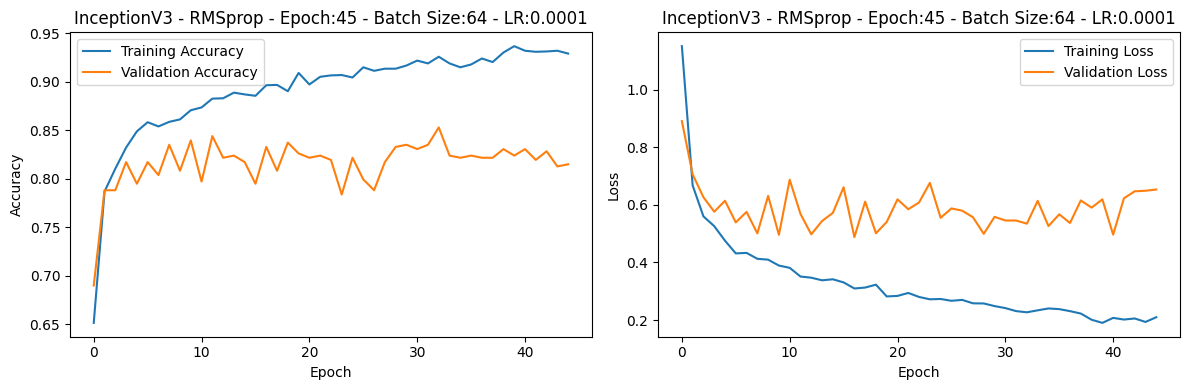

Found 480 images belonging to 12 classes.
8/8 [==============================] - 9s 1s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:64 - LR:0.0001:
[[28  0  3  2  0  2  1  0  0  0  3  1]
 [ 0 36  1  1  0  0  0  0  0  0  2  0]
 [ 0  0 32  2  0  1  0  0  1  0  3  1]
 [ 0  1  3 27  0  1  1  2  4  0  1  0]
 [ 0  0  1  5 29  1  0  1  3  0  0  0]
 [ 2  1  4  0  1 27  3  0  1  0  1  0]
 [ 0  0  1  1  0  0 36  2  0  0  0  0]
 [ 0  0  0  2  0  0  0 38  0  0  0  0]
 [ 0  0  1  2  1  1  1  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.93      0.70      0.80        40
        bees       0.95      0.90      0.92        40
      beetle       0.68      0.80      0.74        40
catterpillar       0.64      0.68      0.66        40
  earthworms       0.94      0.72      0.82        40
      e

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


for history in inception_histories2:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False
    )

    predictions = model.predict(test_generator)

    y_pred = np.argmax(predictions, axis=1)

    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred)

    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json


train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'


img_width, img_height = 224, 224
num_classes = 12
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001

inception_histories3 = []

output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.SGD(learning_rate=inception_learning_rate)

        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        inception_histories3.append({
            'model': 'InceptionV3',
            'optimizer': 'RMSprop',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })


file_path = os.path.join(output_folder, 'inception_histories3.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories3, file)

with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    print("--------------------")


Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/15
88/88 [==============================] - 54s 554ms/step - loss: 2.7773 - accuracy: 0.0700 - val_loss: 2.6871 - val_accuracy: 0.0792
Epoch 2/15
88/88 [==============================] - 49s 557ms/step - loss: 2.5879 - accuracy: 0.0962 - val_loss: 2.5338 - val_accuracy: 0.1229
Epoch 3/15
88/88 [==============================] - 47s 532ms/step - loss: 2.4471 - accuracy: 0.1554 - val_loss: 2.4074 - val_accuracy: 0.1500
Epoch 4/15
88/88 [==============================] - 47s 534ms/step - loss: 2.3271 - accuracy: 0.2095 - val_loss: 2.3007 - val_accuracy: 0.2333
Epoch 5/15
88/88 [==============================] - 48s 549ms/step - loss: 2.2182 - accuracy: 0.2813 - val_loss: 2.1988 - val_accuracy: 0.2854
Epoch 6/15
88/88 [==============================] - 48s 547ms/step - loss: 2.1231 - accuracy: 0.3348 - val_loss: 2.1014 - val_accuracy: 0.3458
Epoch 7/15
88/88 [==============================] - 47s 5

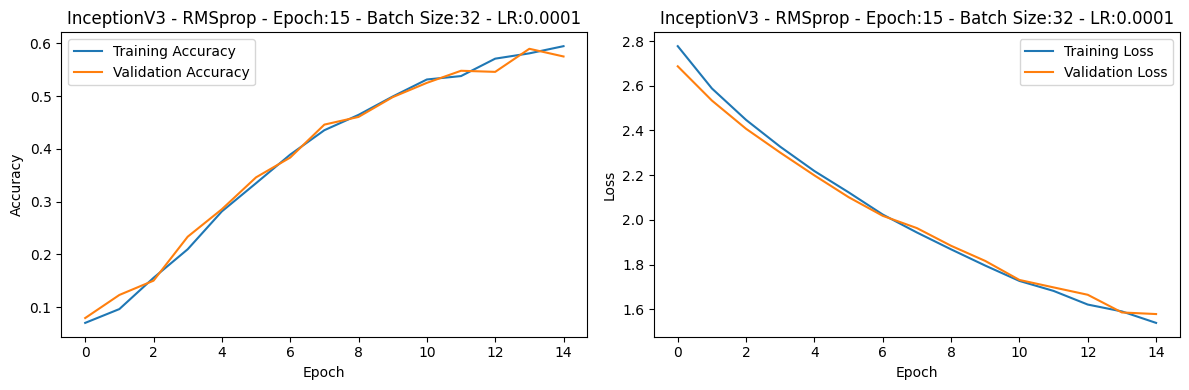

Found 480 images belonging to 12 classes.
15/15 [==============================] - 181s 13s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:32 - LR:0.0001:
[[24  0  1  1  2  4  1  0  0  0  7  0]
 [ 0 32  1  3  2  0  0  0  0  0  2  0]
 [ 0  1 19  2  2  4  2  4  0  0  3  3]
 [ 1  1  1  8  5  2  6 10  3  0  3  0]
 [ 0  0  0  9 16  5  0  2  8  0  0  0]
 [ 2  0  2  5  2 19  3  0  1  0  5  1]
 [ 0  0  1  1  1  3 28  3  2  0  1  0]
 [ 0  0  2  3  3  1  1 23  6  0  1  0]
 [ 0  0  1  2  6  1  0  3 25  2  0  0]
 [ 0  0  1  0  2  0  0  0  0 37  0  0]
 [ 0  4  0  0  0  3  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.89      0.60      0.72        40
        bees       0.84      0.80      0.82        40
      beetle       0.66      0.47      0.55        40
catterpillar       0.24      0.20      0.22        40
  earthworms       0.39      0.40      0.40        40
  

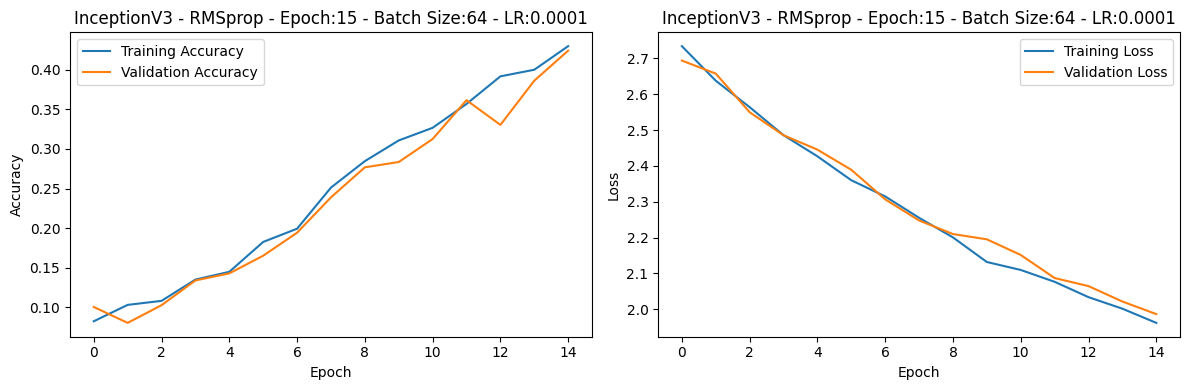

Found 480 images belonging to 12 classes.
8/8 [==============================] - 7s 815ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:64 - LR:0.0001:
[[28  0  0  0  2  3  0  1  0  0  6  0]
 [ 0 25  1  3  2  0  0  3  0  0  6  0]
 [ 0  1 20  3  2  3  0  2  1  0  5  3]
 [ 1  2  1  8  5  3  7  8  2  0  3  0]
 [ 0  0  1  6 23  1  2  3  4  0  0  0]
 [ 0  2  4  4  2 21  1  2  1  0  3  0]
 [ 0  0  0  1  0  4 31  1  2  0  1  0]
 [ 0  0  4  1  3  2  2 27  1  0  0  0]
 [ 0  0  1  4  3  0  0  3 27  0  1  1]
 [ 0  0  0  0  2  0  0  0  2 36  0  0]
 [ 1  8  0  0  0  2  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.93      0.70      0.80        40
        bees       0.66      0.62      0.64        40
      beetle       0.62      0.50      0.56        40
catterpillar       0.27      0.20      0.23        40
  earthworms       0.52      0.57      0.55        40
    

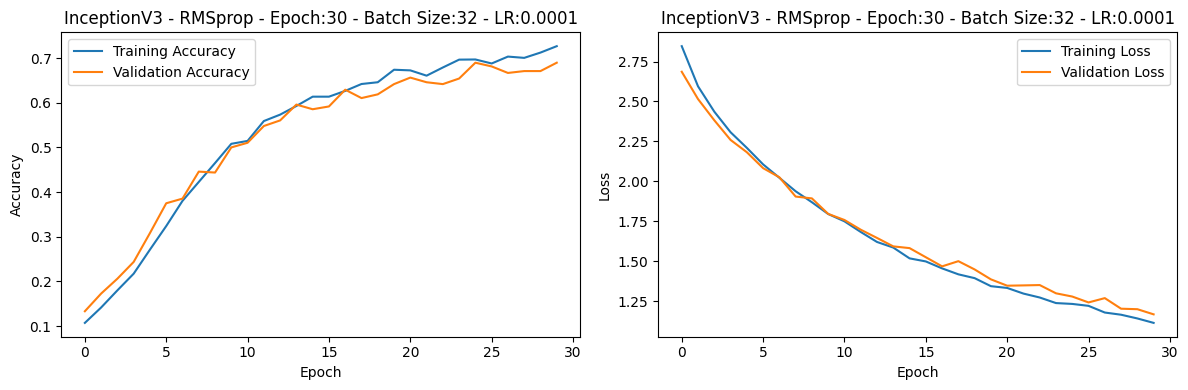

Found 480 images belonging to 12 classes.
15/15 [==============================] - 8s 516ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:32 - LR:0.0001:
[[27  0  2  1  1  3  0  1  0  0  5  0]
 [ 0 28  0  4  2  1  0  0  1  0  4  0]
 [ 0  0 20  6  1  0  1  3  0  0  5  4]
 [ 0  2  0 16  6  3  4  6  2  0  1  0]
 [ 0  0  0  5 19  2  1  2 10  0  1  0]
 [ 0  3  5  5  2 15  5  0  2  0  2  1]
 [ 1  0  1  1  2  2 27  4  2  0  0  0]
 [ 0  0  1  4  3  4  2 22  2  0  1  1]
 [ 0  1  2  5  4  0  1  4 23  0  0  0]
 [ 0  0  2  0  0  0  0  1  0 37  0  0]
 [ 0  4  0  1  0  2  1  0  0  0 32  0]
 [ 0  0  2  0  1  1  0  0  0  0  0 36]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.96      0.68      0.79        40
        bees       0.74      0.70      0.72        40
      beetle       0.57      0.50      0.53        40
catterpillar       0.33      0.40      0.36        40
  earthworms       0.46      0.47      0.47        40
  

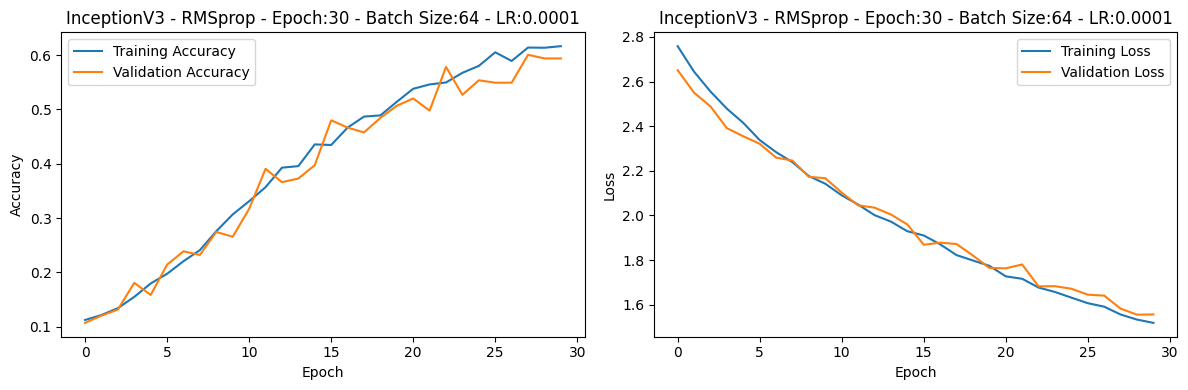

Found 480 images belonging to 12 classes.
8/8 [==============================] - 6s 799ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:64 - LR:0.0001:
[[27  1  0  0  4  4  0  1  0  0  3  0]
 [ 0 26  1  2  1  1  0  1  1  0  7  0]
 [ 0  1 17  3  4  2  0  1  1  0  6  5]
 [ 1  0  2 14  6  6  1  4  5  0  1  0]
 [ 0  0  0  5 22  1  1  5  6  0  0  0]
 [ 1  1  2  5  1 17  2  2  2  0  6  1]
 [ 0  1  0  2  2  2 24  6  1  0  2  0]
 [ 0  0  4  3  1  4  2 22  3  0  1  0]
 [ 0  0  0  2  5  1  0  6 23  2  0  1]
 [ 0  0  1  1  0  1  0  0  1 36  0  0]
 [ 0  3  0  0  0  1  1  0  0  0 35  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.93      0.68      0.78        40
        bees       0.79      0.65      0.71        40
      beetle       0.61      0.42      0.50        40
catterpillar       0.38      0.35      0.36        40
  earthworms       0.48      0.55      0.51        40
    

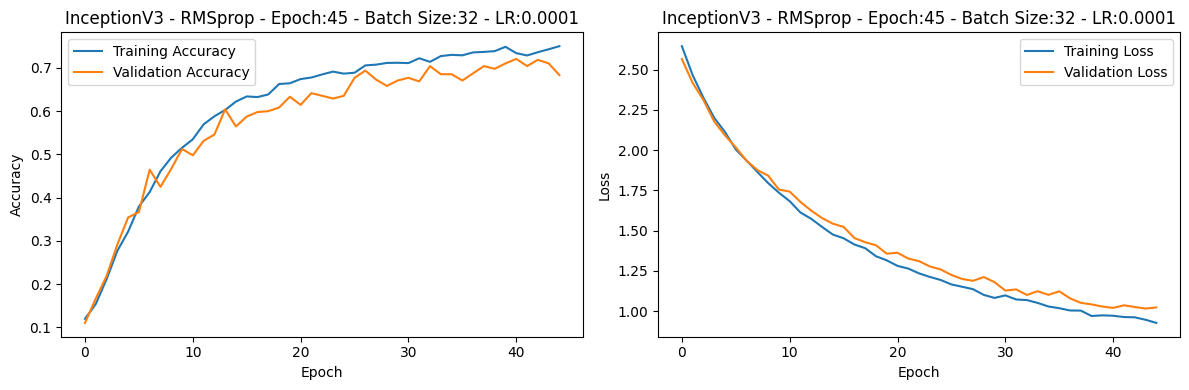

Found 480 images belonging to 12 classes.
15/15 [==============================] - 6s 412ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:32 - LR:0.0001:
[[26  1  0  2  3  2  1  0  0  0  5  0]
 [ 0 28  1  2  2  0  0  2  0  0  5  0]
 [ 0  1 18  3  1  6  1  0  3  0  4  3]
 [ 0  0  0  9  5  5  7  8  2  0  4  0]
 [ 0  0  1  5 20  3  0  5  6  0  0  0]
 [ 1  0  2  4  2 16  3  1  3  0  7  1]
 [ 0  1  0  3  1  5 26  2  1  0  1  0]
 [ 0  0  1  3  6  4  1 22  2  0  1  0]
 [ 0  0  0  2  8  0  0  2 27  1  0  0]
 [ 0  1  1  1  0  0  0  0  2 35  0  0]
 [ 1  6  0  0  0  2  0  0  0  0 31  0]
 [ 0  0  2  0  1  0  0  0  0  0  0 37]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.93      0.65      0.76        40
        bees       0.74      0.70      0.72        40
      beetle       0.69      0.45      0.55        40
catterpillar       0.26      0.23      0.24        40
  earthworms       0.41      0.50      0.45        40
  

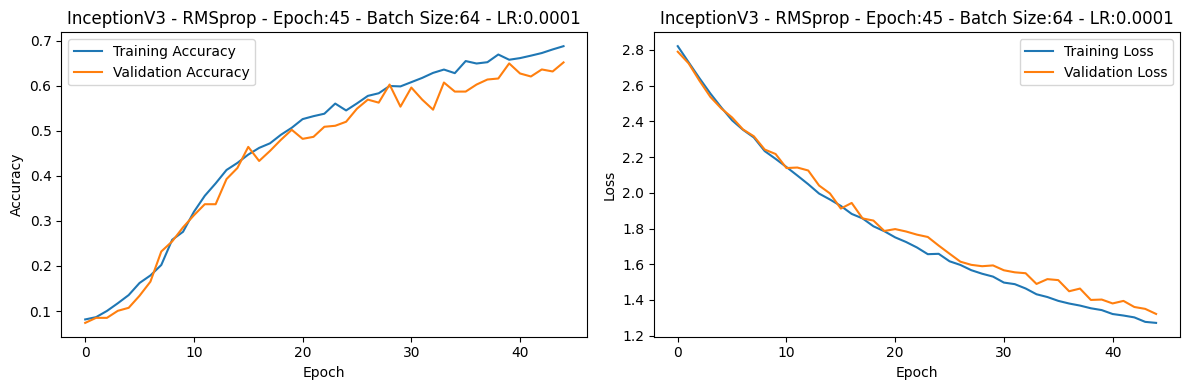

Found 480 images belonging to 12 classes.
8/8 [==============================] - 8s 889ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:64 - LR:0.0001:
[[29  0  0  2  2  1  2  2  0  0  2  0]
 [ 0 31  0  2  1  1  0  0  0  0  5  0]
 [ 0  1 20  5  1  2  1  2  1  0  5  2]
 [ 0  4  2  8  4  2  3  7  7  0  3  0]
 [ 0  0  1  7 19  1  0  1 11  0  0  0]
 [ 2  3  5  4  1 16  3  0  1  0  4  1]
 [ 0  0  0  2  1  3 29  2  1  0  2  0]
 [ 0  0  3  5  2  1  2 25  2  0  0  0]
 [ 0  2  1  1  6  0  2  4 22  2  0  0]
 [ 0  0  2  0  0  0  0  0  1 37  0  0]
 [ 1  5  1  0  0  1  2  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.91      0.72      0.81        40
        bees       0.67      0.78      0.72        40
      beetle       0.57      0.50      0.53        40
catterpillar       0.22      0.20      0.21        40
  earthworms       0.51      0.47      0.49        40
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

for history in inception_histories3:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False
    )

    predictions = model.predict(test_generator)

    y_pred = np.argmax(predictions, axis=1)

    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred)

    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json

train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'

img_width, img_height = 224, 224
num_classes = 12
inception_epochs = [45]
inception_batch_sizes = [64]

inception_histories = []

output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.Adam()

        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        for layer in model.layers:
            if hasattr(layer, 'kernel_regularizer'):
                setattr(layer, 'kernel_regularizer', None)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        inception_histories.append({
            'model': 'InceptionV3',
            'optimizer': 'Adam',
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })

file_path = os.path.join(output_folder, 'a.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories, file)

with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

for history in loaded_histories:
    print(f"Model: {history['model']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    print("--------------------")

87910968/87910968 [==============================] - 1s 0us/step
Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/45
44/44 [==============================] - 1242s 28s/step - loss: 1.3702 - accuracy: 0.6661 - val_loss: 0.6669 - val_accuracy: 0.7768
Epoch 2/45
44/44 [==============================] - 55s 1s/step - loss: 0.5869 - accuracy: 0.8116 - val_loss: 0.6654 - val_accuracy: 0.7768
Epoch 3/45
44/44 [==============================] - 55s 1s/step - loss: 0.5115 - accuracy: 0.8356 - val_loss: 0.6459 - val_accuracy: 0.8058
Epoch 4/45
44/44 [==============================] - 55s 1s/step - loss: 0.4673 - accuracy: 0.8410 - val_loss: 0.7867 - val_accuracy: 0.7679
Epoch 5/45
44/44 [==============================] - 52s 1s/step - loss: 0.4486 - accuracy: 0.8515 - val_loss: 0.6735 - val_accuracy: 0.7879
Epoch 6/45
44/44 [==============================] - 54s 1s/step - loss: 0.4226 - accuracy: 0.8523 - val_loss: 0.5758 - val_accuracy: 0.8237
Epoch 7

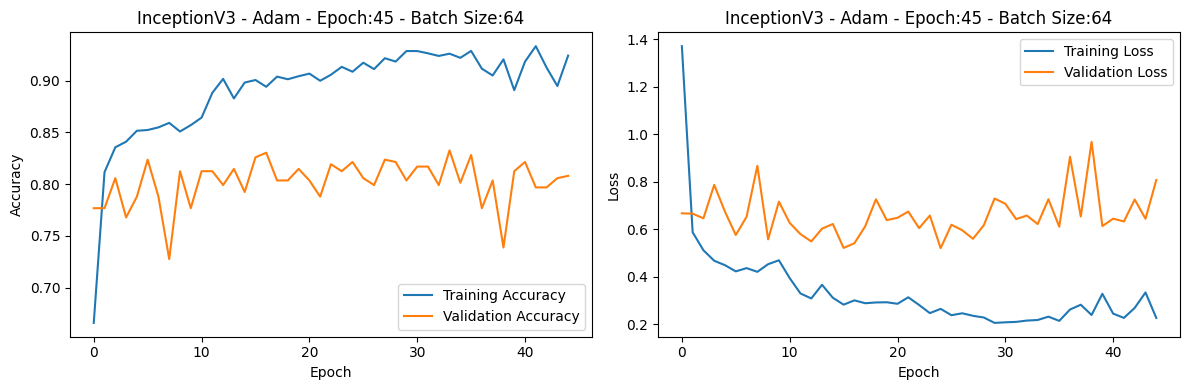

Found 480 images belonging to 12 classes.
8/8 [==============================] - 172s 24s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:64:
[[33  1  2  0  0  4  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  1  0]
 [ 1  3 25  1  0  3  1  0  1  0  2  3]
 [ 0  5  0 26  3  3  1  0  1  0  1  0]
 [ 0  0  0  2 37  0  0  0  1  0  0  0]
 [ 3  3  0  3  2 25  0  0  1  0  2  1]
 [ 1  3  1  4  1  0 27  3  0  0  0  0]
 [ 1  0  0  1  0  0  0 38  0  0  0  0]
 [ 0  4  1  5  5  2  0  0 23  0  0  0]
 [ 0  0  1  0  0  0  0  0  0 39  0  0]
 [ 0  4  0  0  0  1  0  0  0  0 35  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 39]]

Classification Report:
              precision    recall  f1-score   support

        ants       0.85      0.82      0.84        40
        bees       0.62      0.97      0.76        40
      beetle       0.83      0.62      0.71        40
catterpillar       0.62      0.65      0.63        40
  earthworms       0.77      0.93      0.84        40
      earwig       

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

for history in inception_histories:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False
    )

    predictions = model.predict(test_generator)

    y_pred = np.argmax(predictions, axis=1)

    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred)

    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')
